### Name: Sohan Rudra
### Roll No: 16MA20054

In [29]:
#library imports
import math
from collections import namedtuple
import numpy as np
from sympy import symbols
import matplotlib.pyplot as plt

In [30]:
#some boilerplate code
x = symbols('x')
Equation = namedtuple('Equation',('a','b','c'))
Conditions = namedtuple('Conditions',('x0','xn','h'))
Boundary = namedtuple('Boundary', ('alpha', 'beta', 'gamma'))

In [31]:
def Finite_Diff_Solver(eq, bc0, bcn, cond, verbose=True):
    n = int(np.ceil((cond.xn - cond.x0)/cond.h))
    a, b, c, d = np.zeros((n)), np.zeros((n+1)), np.zeros((n)), np.zeros((n+1))
    #A
    b[0] = -2.0 / cond.h**2 + eq.b.subs(x, cond.x0) +\
    (1.0 / cond.h**2 - eq.a.subs(x, cond.x0) / (2.0 * cond.h)) *\
    2.0 * cond.h * bc0.alpha / bc0.beta
    c[0] = 2.0 / cond.h**2 

    a[n-1] = 2.0 / cond.h**2 
    b[n] = -2.0 / cond.h**2 + eq.b.subs(x, cond.xn) -\
    (1.0 / cond.h**2 + eq.a.subs(x, cond.xn) / (2.0 * cond.h)) *\
    2.0 * cond.h * bcn.alpha / bcn.beta
    
    #d
    d[0] = eq.c.subs(x, cond.x0) +\
    (1.0 / cond.h**2 - eq.a.subs(x, cond.x0) / (2.0 * cond.h)) *\
    2.0 * cond.h * bc0.gamma / bc0.beta
    d[n] = eq.c.subs(x, cond.xn) -\
    (1.0 / cond.h**2 + eq.a.subs(x, cond.xn) / (2.0 * cond.h)) *\
    2.0 * cond.h * bcn.gamma / bcn.beta
    for i, xi in enumerate(np.arange(cond.x0 + cond.h, cond.xn, cond.h),\
                           start=1):
        a[i-1] = 1.0 / cond.h**2 - eq.a.subs(x,xi) / (2.0*cond.h)
        b[i] = -2.0 / cond.h**2 + eq.b.subs(x, xi)
        c[i] = 1.0 / cond.h**2 + eq.a.subs(x,xi) / (2.0*cond.h)
        d[i] = eq.c.subs(x, xi)
    
    def tridiag(a, b, c, k1=-1, k2=0, k3=1):
        return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)
    if verbose:
        print("A={}".format(tridiag(a,b,c)))
        print("d={}".format(d.T))
    return (a,b,c,d)

In [32]:
def Thomas_Algorithm(coeff, bc0, bcn, cond):
    a, b, c, d = coeff
    n = int(np.ceil((cond.xn - cond.x0)/cond.h))
    c1 = np.zeros((n))
    d1 = np.zeros((n+1))
    c1[0] = c[0]/b[0]
    d1[0] = d[0]/b[0]
    for i in range(1,n):
        c1[i] = c[i]/(b[i]-a[i-1]*c1[i-1])
        d1[i] = (d[i] - a[i-1] * d1[i-1])/(b[i]-a[i-1]*c1[i-1])
    d1[n] = (d[n] - a[n-1] * d1[n-1])/(b[n] - a[n-1]*c1[n-1])
    def backsubstitution(c,d):
        y = np.zeros_like(d)
        y[-1] = d[-1]
        cache = y[-1]
        for i in reversed(range(d.shape[0]-1)):
            y[i] = d[i] - cache * c[i]
            cache = y[i]
        return y
    fin_y = backsubstitution(c1,d1)
    return fin_y
    

In [33]:
%%latex
\begin{align}
y'' -2xy' -2y = -4x\\
x \in (0,1) \\
y(0) - y'(0) = 0\\
2y(1) - y'(1) = 1\\
\end{align}

<IPython.core.display.Latex object>

In [34]:
#Equations & Boundary Conditions
eqn = Equation(-2.0*x,-2.0 + x*0.0,-4.0*x)
bc1 = Boundary(1,-1,0)
bc2 = Boundary(2,-1,1)
cond1 = Conditions(0,1,0.1)
tuples_coeff = Finite_Diff_Solver(eqn, bc1, bc2, cond1, verbose=False)
y1 = Thomas_Algorithm(tuples_coeff, bc1, bc2, cond1)
x_range1 = np.arange(cond1.x0, cond1.xn+cond1.h, cond1.h)
cond2 = Conditions(0,1,0.05)
tuples_coeff = Finite_Diff_Solver(eqn, bc1, bc2, cond2, verbose=False)
y2 = Thomas_Algorithm(tuples_coeff, bc1, bc2, cond2)
x_range2 = np.arange(cond2.x0, cond2.xn+cond2.h, cond2.h)
cond3 = Conditions(0,1,0.001)
tuples_coeff = Finite_Diff_Solver(eqn, bc1, bc2, cond3, verbose=False)
y3 = Thomas_Algorithm(tuples_coeff, bc1, bc2, cond3)
x_range3 = np.arange(cond3.x0, cond3.xn+cond3.h, cond3.h)
cond4 = Conditions(0,1,0.0005)
tuples_coeff = Finite_Diff_Solver(eqn, bc1, bc2, cond4, verbose=False)
y4 = Thomas_Algorithm(tuples_coeff, bc1, bc2, cond4)
x_range4 = np.arange(cond4.x0, cond4.xn+cond4.h, cond4.h)

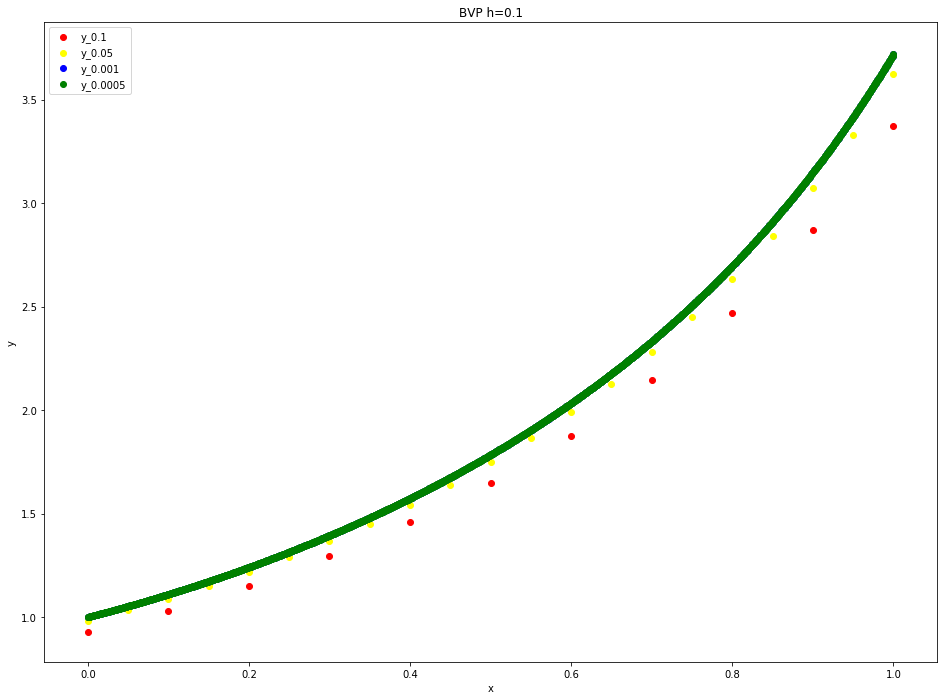

In [35]:
t1 = np.arange(cond.x0, cond.xn, 0.001)

#print(x_range)
fig = plt.figure(figsize=(16, 40))
ax = fig.add_subplot(311)
ax.set(title="BVP h=0.1", xlabel="x", ylabel="y")
ax.scatter(x_range1, y1, color='red')
ax.scatter(x_range2, y2, color='yellow')
ax.scatter(x_range3, y3, color='blue')
ax.scatter(x_range4, y4, color='green')
ax.legend(('y_0.1','y_0.05','y_0.001','y_0.0005'))
ax.plot()
fig.show()